# **Image Filtering**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import utils

In image processing, a *filter*, also known as a kernel or convolution kernel, is a small matrix used to perform operations like convolution on an image. These filters play a crucial role in various image processing tasks such as blurring, sharpening, edge detection, and noise reduction.

If you would like to learn more about them, there is a great visualization tool available [here](https://setosa.io/ev/image-kernels/).

---

One common issue with kernels in image processing is how to deal with the edge (boundaries) of an image. As the kernel "slides" over the image, pixels at the edges may not have enough neighboring pixels to complete the convolution operation fully. This can result in incomplete or distorted filtering near the image boundaries and result in an image whose dimensions are different than that of the starting image.

Techniques like zero-padding (adding zeros around the image) or using other padding methods are often employed to address these boundary issues. You can read more about them in the PowerPoint slides on Fitering.

---
Filters in image processing can be broadly categorized into two main classes based on their nature: linear filters and non-linear filters.

**Linear filters** are characterized by the property of linearity, meaning that the output of the filter is a linear combination of the input pixel values. Examples of such linear filters include box filters and gaussian filters.

**Non-linear** filters do not adhere to the linearity property, and their output is not a linear combination of input pixel values. These filters typically involve non-linear operations on the pixel values. An example of a non-linear filter would be the median filter.

## **Box Filter**

A **box filter**, also known as a box blur or a mean filter, is a type of linear filter that performs simple averaging to achieve a smoothing or blurring effect on an image. The filter uses a square-shaped kernel where all the elements have the same value.

In OpenCV, you can implement a box filter using the `cv2.boxFilter()` function

`cv2.boxFilter(src, ddepth, ksize, borderType = )`
- src : The input image
- ddepth : Specifies the data type of the pixels in the output image
    - cv2.CV_8U: 8-bit unsigned integers (0 to 255). This is often used for representing images with pixel values in the range [0, 255]
    - cv2.CV_32F or cv2.CV_64F: 32-bit/64-bit floating-point numbers. This is often used for images with pixel values in a continuous range
    - -1: Maintain the same ddept as the input image
- ksize : Size of the box kernel. An tuple specifying the width and height of the kernel.
- borderType : The pixel extrapolation method. (This is to deal with the problem mentioned above)
    - cv2.BORDER_CONSTANT: The border is filled with a constant value (by default 0). This value may be modified using the 'value' parameter
    - cv2.BORDER_REPLICATE: Replicates the nearest border element to fill the border
    - cv2.BORDER_REFLECT: Reflects the border elements
    - cv2.BORDER_WRAP: Wraps the image around, creating a seamless border

In [2]:
img_GRAY = cv2.imread('data/images/trees.jpg')
img_GRAY_filtered = cv2.boxFilter(img_GRAY, -1, (7,7), borderType = cv2.BORDER_CONSTANT)

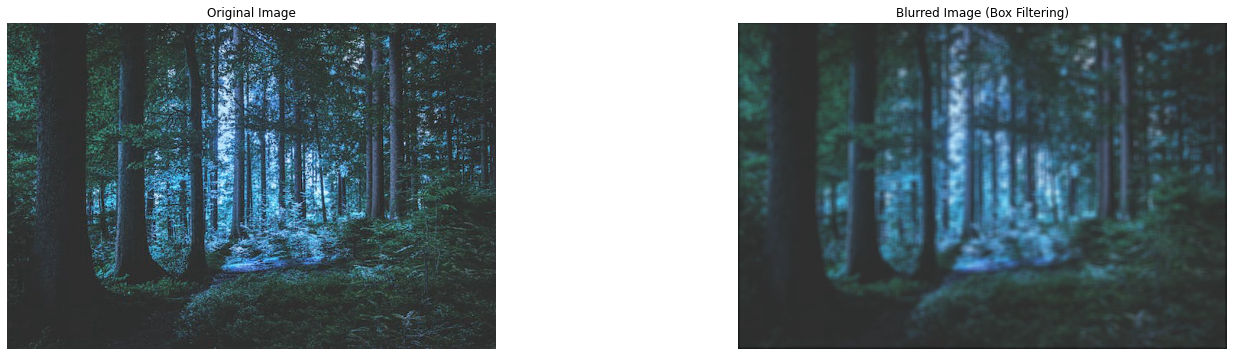

In [3]:
plt.figure(figsize = (24, 6))

plt.subplot(121)
plt.imshow(img_GRAY)
plt.title("Original Image")
plt.axis('off')

plt.subplot(122)
plt.imshow(img_GRAY_filtered)
plt.title("Blurred Image (Box Filtering)")
plt.axis('off');

As observed, the boxFilter produces an excessive blur in the given image, primarily due to assigning equal weights to each pixel in the kernel. An alternative approach to address this issue is the use of a Gaussian filter.

## **Gaussian Filter**

A **Gaussian filter** is a linear filter that applies a weighted average to the neighboring pixels, giving more emphasis to the central pixels and less to the ones farther away. This results in a smoother transition and better preservation of edges compared to a box filter, which applies a simple unweighted average.

In OpenCV, you can implement a Gaussian filter using the `cv2.GaussianBlur()` function

`cv2.GaussianBlur(src, ksize, sigmaX[, dst[, sigmaY[, borderType]]])`
- src : The source image
- ksize : Gaussian kernel size. Specify a tuple (width, height)
- sigmaX : Standard deviation of the Gaussian kernel in the X direction
- dst (optional) : Output image
- sigmaY (optional) : Standard deviation of the Gaussian kernel in the Y direction. If not specified, it is assumed to be equal to sigmaX.
- borderType (optional) : Pixel extrapolation method

> Note: The larger the values of sigmaX and sigmaY, the more the blur

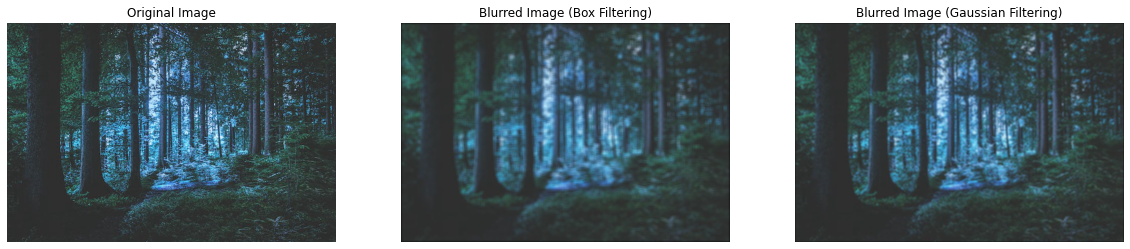

In [4]:
img_GRAY = cv2.imread('data/images/trees.jpg')
img_GRAY_box_filtered = cv2.boxFilter(img_GRAY, -1, (7,7), borderType = cv2.BORDER_CONSTANT)
img_GRAY_gaussian_filtered = cv2.GaussianBlur(img_GRAY, (5, 5), sigmaX = 2, sigmaY = 2, borderType = cv2.BORDER_CONSTANT)

plt.figure(figsize = (20, 6))

plt.subplot(131)
plt.imshow(img_GRAY)
plt.title("Original Image")
plt.axis('off')

plt.subplot(132)
plt.imshow(img_GRAY_box_filtered)
plt.title("Blurred Image (Box Filtering)")
plt.axis('off');

plt.subplot(133)
plt.imshow(img_GRAY_gaussian_filtered)
plt.title("Blurred Image (Gaussian Filtering)")
plt.axis('off');

## **Median Filter**
A **median filter** is a non-linear filter commonly used for noise reduction in images. It replaces each pixel's value with the median value in its neighborhood. In OpenCV, you can implement a median filter using the `cv2.medianBlur()` function

`cv2.medianBlur(src, ksize[, dst])`
- src : The input image
- ksize : The size of the median kernel. Must be a positive odd integer greater than 1
- dst (optional) : The output image

> Note: The median filter is particularly effective in removing salt-and-pepper noise, which appears as random, isolated pixels with extreme intensity values

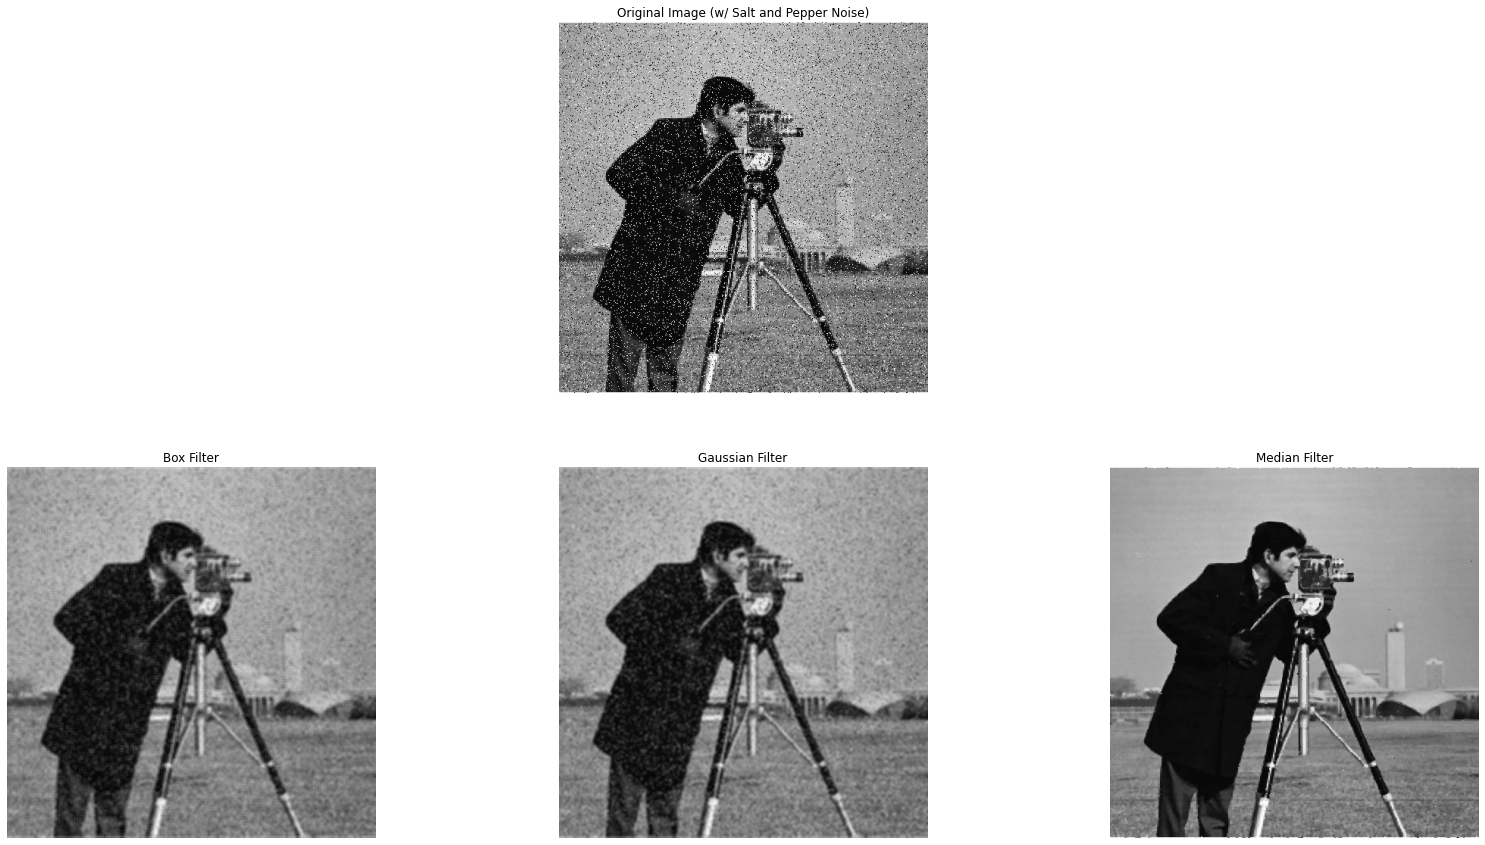

In [5]:
img_BGR = cv2.imread('data/images/cameraman.png')
img_BGR_noise = utils.sp_noise(img_BGR, .1)

img_BGR_noise_box_filtered = cv2.boxFilter(img_BGR_noise, -1, (5, 5))
img_BGR_noise_gaussian_filtered = cv2.GaussianBlur(img_BGR_noise, (5, 5), 2)
img_BGR_noise_median_filtered = cv2.medianBlur(img_BGR_noise, 3)

plt.figure(figsize = (28, 15))

plt.subplot(232)
plt.imshow(img_BGR_noise)
plt.title("Original Image (w/ Salt and Pepper Noise)")
plt.axis('off')

plt.subplot(234)
plt.imshow(img_BGR_noise_box_filtered)
plt.title("Box Filter")
plt.axis('off')

plt.subplot(235)
plt.imshow(img_BGR_noise_gaussian_filtered)
plt.title("Gaussian Filter")
plt.axis('off')

plt.subplot(236)
plt.imshow(img_BGR_noise_median_filtered)
plt.title("Median Filter")
plt.axis('off');

## **Laplacian Filter**
The **Laplacian filter** is commonly used for image sharpening. OpenCV provides a convenient function called `cv2.Laplacian()` for this purpose.

`cv2.Laplacian(src, ddept, ksize = )`
- src: The input image
- ddept: The desired dept of the outptu image
- ksize: The size of the kernel

It is often advised to apply a Gaussian blur before applying the Laplacian filter for image sharpening. This two-step process is commonly known as Laplacian of Gaussian (LoG) or Gaussian-Laplacian sharpening. The rationale behind using a Gaussian blur is to reduce noise in the image and prevent the sharpening process from amplifying high-frequency noise.

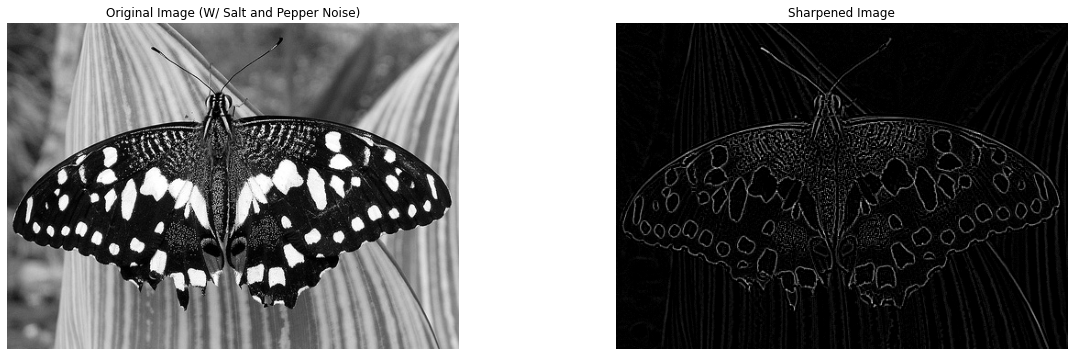

In [6]:
img_GRAY = cv2.imread('data/images/butterfly.jpg', cv2.IMREAD_GRAYSCALE)

img_filtered = cv2.GaussianBlur(img_GRAY, (3, 3), 2)
img_sharpened = cv2.Laplacian(img_filtered, cv2.CV_64F)

img_sharpened = img_sharpened.clip(0, 255)
img_sharpened = img_sharpened.astype(np.uint8)

plt.figure(figsize = (20, 6))

plt.subplot(121)
plt.title("Original Image (W/ Salt and Pepper Noise)")
plt.axis('off')
plt.imshow(img_GRAY, cmap = 'gray')

plt.subplot(122)
plt.title("Sharpened Image")
plt.axis('off')
plt.imshow(img_sharpened, cmap = 'gray');